<a href="https://colab.research.google.com/github/jeffyjohny7/ict/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


Loading the dataset

In [2]:
i10 = pd.read_csv('/content/car_age_price.csv')

In [3]:
i10.head(3)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000


In [4]:
sh = i10.shape
print(" Shape of the Dataset ")
print("Number of Rows:- ",sh[0],"\nNumber of Columns:- ",sh[1])

 Shape of the Dataset 
Number of Rows:-  112 
Number of Columns:-  2


In [5]:
i10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


Data exploration and cleaning

In [6]:
i10.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
pd.DataFrame([i10.isnull().sum(),i10.isna().sum()],index=['Null','NA'])

,Year,Price
Null,0,0
NA,0,0


In [8]:
x = i10['Year']
y = i10['Price']

Text(0.5, 1.0, 'Price Column with Outliers')

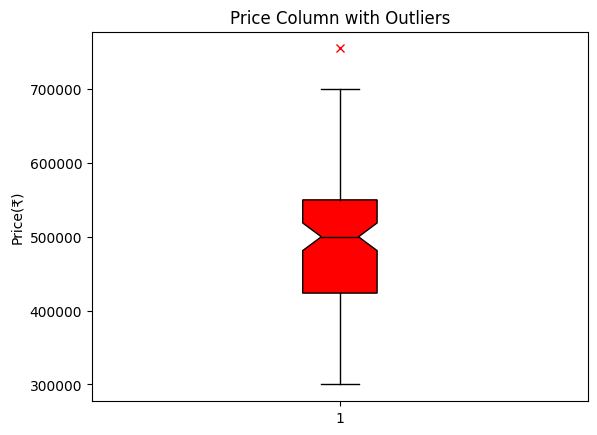

In [9]:
flier = dict(marker='x',markeredgecolor='r')
box = dict(facecolor='red')
median = dict(color='k')

plt.boxplot(y,flierprops=flier,boxprops=box,notch=True,patch_artist=True,medianprops=median)
plt.ylabel("Price(₹)")
plt.title("Price Column with Outliers")


In [10]:
# Handling outliers
q1 = np.quantile(y,0.25)
q3 = np.quantile(y,0.75)
iqr = q3-q1
c = 1.5
min = q1 - c * iqr
max = q3 + c * iqr
outlier = i10[(i10['Price'] < min) | (i10['Price'] > max)]

# Removing the outlier
i10 = i10.drop(outlier.index[0])


Text(0.5, 1.0, 'Price Column without Outliers')

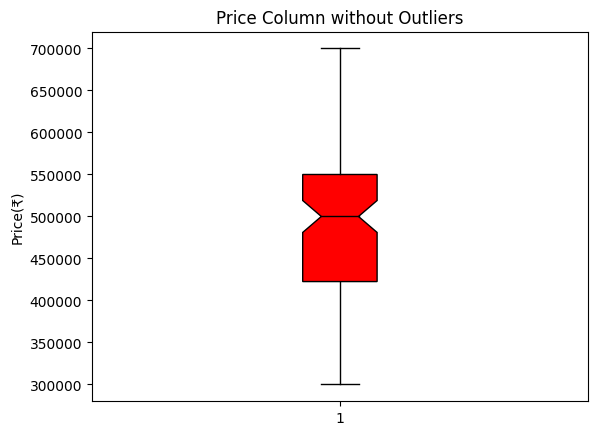

In [12]:
# Checking for Outliers after the clean-up
flier = dict(marker='x',markeredgecolor='r')
box = dict(facecolor='red')
median = dict(color='k')

plt.boxplot(i10['Price'],flierprops=flier,boxprops=box,notch=True,patch_artist=True,medianprops=median)
plt.ylabel("Price(₹)")
plt.title("Price Column without Outliers")



Linear Relationship


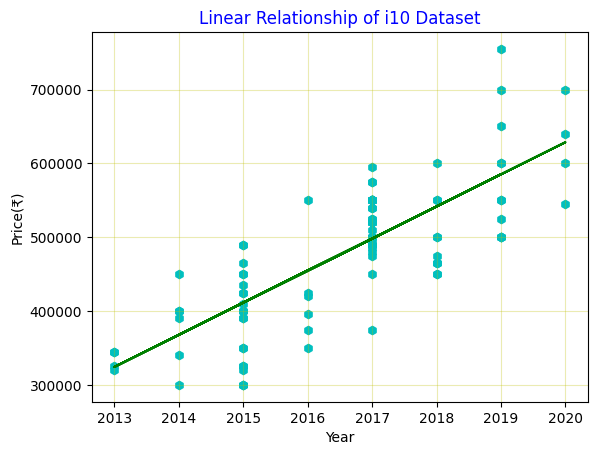

In [13]:
plt.scatter(x,y,c='c',marker='h')
plt.xlabel("Year")
plt.ylabel("Price(₹)")
plt.grid(True,c='y',alpha=0.3)
plt.title("Linear Relationship of i10 Dataset", c='b')

# Getting the linear information of our data
m, c = np.polyfit(x,y,1)

# Plor the regression line from linear data
plt.plot(x,m*x+c,c='g')

In [14]:
print("Pearson's r:",round(stats.pearsonr(x,y)[0],2))

Pearson's r: 0.78


The correlation coefiicient r > 0.7, which indicate strong positive correlation, and it can seen from our scatterplot.


Predicting The Price in 2022

In [15]:
def predict_price(year):
  n = year
  price = m*n+c
  return round(price,2)


In [16]:
print("The price of second-hand i10 car in 2022 would be",predict_price(2022))

The price of second-hand i10 car in 2022 would be 715488.08


Regression Models

In [17]:
df = i10.copy()
col = df.columns

# Spliting the dataset into train and test set
train_df, test_df= split(df,test_size=0.1,random_state= 100)

In [18]:
scale = StandardScaler()

In [19]:
train_df[col] = scale.fit_transform(train_df[col])

train_x  = train_df['Year'].values.reshape(-1,1)
train_y = train_df['Price'].values.reshape(-1,1)

test_df[col] = scale.fit_transform(test_df[col])

test_x = test_df['Year'].values.reshape(-1,1)
test_y = test_df['Price'].values.reshape(-1,1)

Linear Regression

In [20]:
# Initializing

LinReg = LinearRegression()
LinReg.fit(train_x,train_y)
pred_y = LinReg.predict(test_x)

# Evaluation

score = LinReg.score(test_x,test_y)*100
print("Accuracy Score (%):",round(score,2))
mae = mean_absolute_error(pred_y,test_y)
print("MAE:",round(mae,2))
mse = mean_squared_error(pred_y,test_y)
print("MSE:",round(mse,2))

Accuracy Score (%): 84.74
MAE: 0.31
MSE: 0.15


Lasso Regression

In [21]:
# Initializing

LaReg = Lasso(alpha=0.1e-4, random_state=10, selection='cyclic')
LaReg.fit(train_x,train_y)
pred_y = LaReg.predict(test_x)


# Evaluation

score = LaReg.score(test_x,test_y)*100
print("Accuracy Score (%):",round(score,2))
mae = mean_absolute_error(pred_y,test_y)
print("MAE:",round(mae,2))
mse = mean_squared_error(pred_y,test_y)
print("MSE:",round(mse,2))
print("RMSE:",round(np.sqrt(mse),2))
r2 = r2_score(pred_y,test_y)
print("R2:",r2)

Accuracy Score (%): 84.74
MAE: 0.31
MSE: 0.15
RMSE: 0.39
R2: 0.7380246962565096


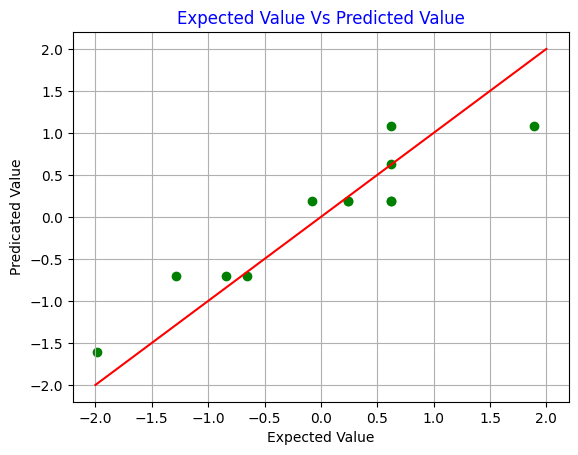

In [22]:
# r = range(300000,600000)
r = [-2,2]
plt.scatter(test_y,pred_y,c='g')
plt.grid(True)
plt.xlabel("Expected Value")
plt.ylabel("Predicated Value")
plt.title("Expected Value Vs Predicted Value",c='b')
plt.plot(r,r,c='r')

After performing both Linear Regression and Lasso Regression, they both gave same result, which is that both model gave r2 score above 0.7, therefore it can be regarded as very good model.